# Product-Product graph

In [2]:
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import community

G = pickle.load(open('graphs/product_product_graph.pickle', 'rb'))
G = G.subgraph(max(nx.connected_components(G), key=len))

data = pd.read_csv('data/Reviews.csv')

In [67]:
degrees = [d for _, d in G.degree]

v = [i - 0.5 for i in range(np.min(degrees), np.max(degrees) + 2)]
h = np.histogram(degrees, v)[0]

x = [np.mean([v[i], v[i+1]]) for i in range(len(v)-1)]

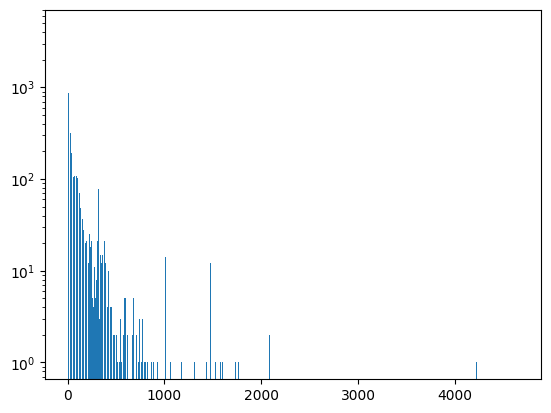

In [68]:
plt.bar(x, h)
plt.yscale('log')
plt.show()

In [69]:
[p for p, d in G.degree if d > 4000]

['B0041NYV8E', 'B002IEVJRY', 'B002IEZJMA']

In [59]:
# data.loc[data.ProductId == 'B002IEZJMA'] # coffee
# data.loc[data.ProductId == 'B002IEVJRY'] # iced coffee
# data.loc[data.ProductId == 'B0041NYV8E'] # ginger drink

In [80]:
G_undirected = nx.to_undirected(G)
partition = nx.community.louvain_communities(G_undirected, seed=123)

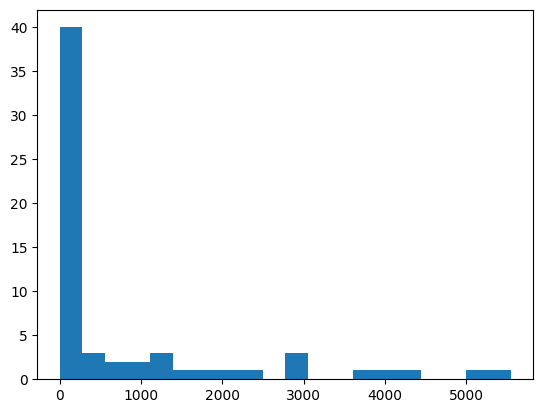

In [100]:
partition_len = [len(p) for p in partition]

plt.hist(partition_len, 20)
plt.show()

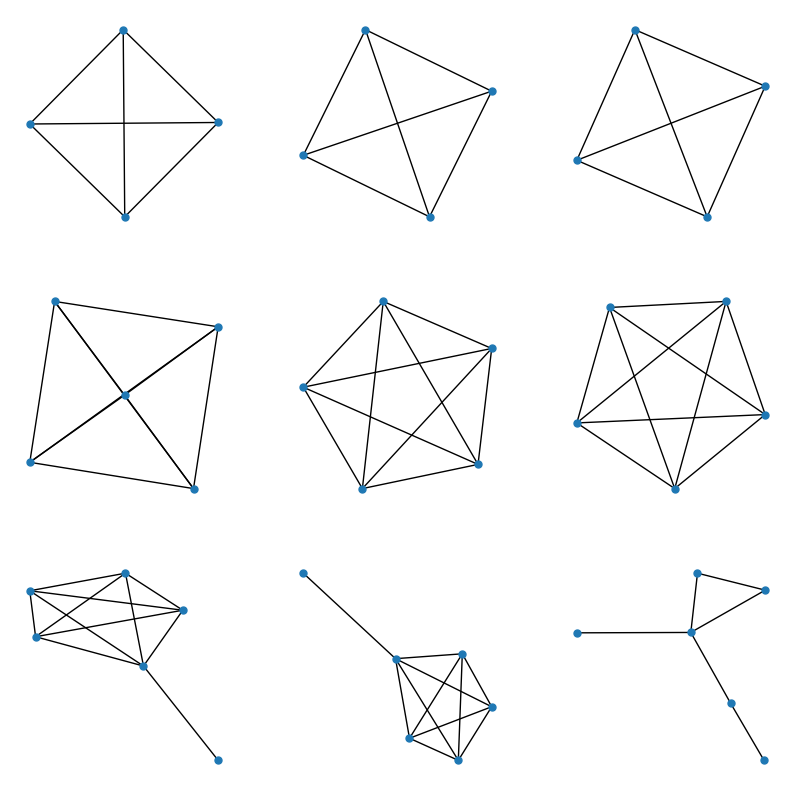

In [123]:
partition = sorted(partition, key=len)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    nx.draw(G.subgraph(partition[i]), node_size=25)

In [134]:
# https://www.amazon.com/product-reviews/ProductId to access product
# partition[0] # Breakfast Cereal, Blend coffee, Instant Coffee, Mixed Berries
# partition[1] # Organic Tea, Chai Tea, Chai Tea, Chai Tea
# partition[2] # French coffee, Corn meal, chile peppers, black rice
# data.loc[data.ProductId == 'B001M1V87A']

{'B001EPQNE2', 'B0029JXKTI', 'B002T1BV5Q', 'B005E30WY2'}

# User-Product Graph

In [3]:
UP = pickle.load(open('graphs/user_product_graph.pickle', 'rb'))
UP = UP.subgraph(max(nx.connected_components(UP), key=len))

In [7]:
degrees = [d for _, d in UP.degree]

v = [i - 0.5 for i in range(np.min(degrees), np.max(degrees) + 2)]
h = np.histogram(degrees, v)[0]

x = [np.mean([v[i], v[i+1]]) for i in range(len(v)-1)]

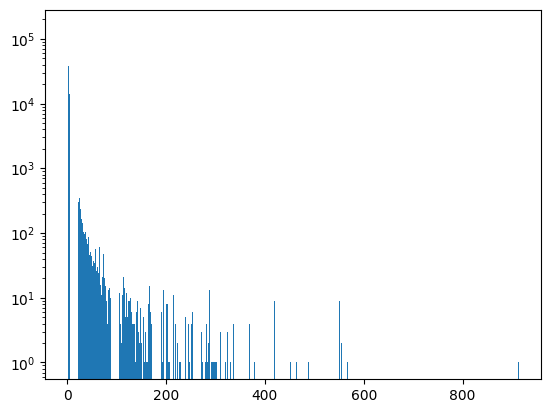

In [8]:
plt.bar(x, h)
plt.yscale('log')
plt.show()

In [9]:
[p for p, d in UP.degree if d > 800]

['B007JFMH8M']

In [11]:
# data.loc[data.ProductId == 'B007JFMH8M'] # cookies

In [12]:
UP_undirected = nx.to_undirected(UP)
partition = nx.community.louvain_communities(UP_undirected, seed=123)

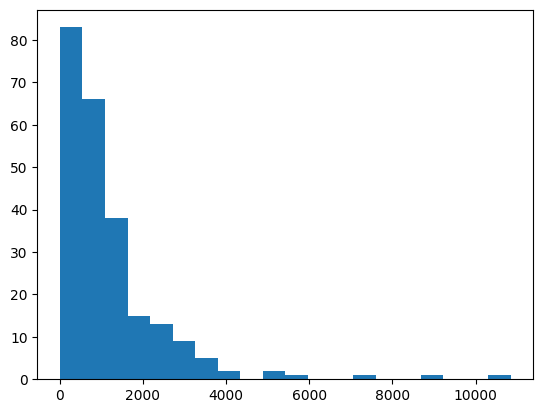

In [13]:
partition_len = [len(p) for p in partition]

plt.hist(partition_len, 20)
plt.show()

In [26]:
partition = sorted(partition, key=len)
partition_products = [p for p in partition if sum([e.startswith('B') for e in p]) >= 3] # At least 3 products

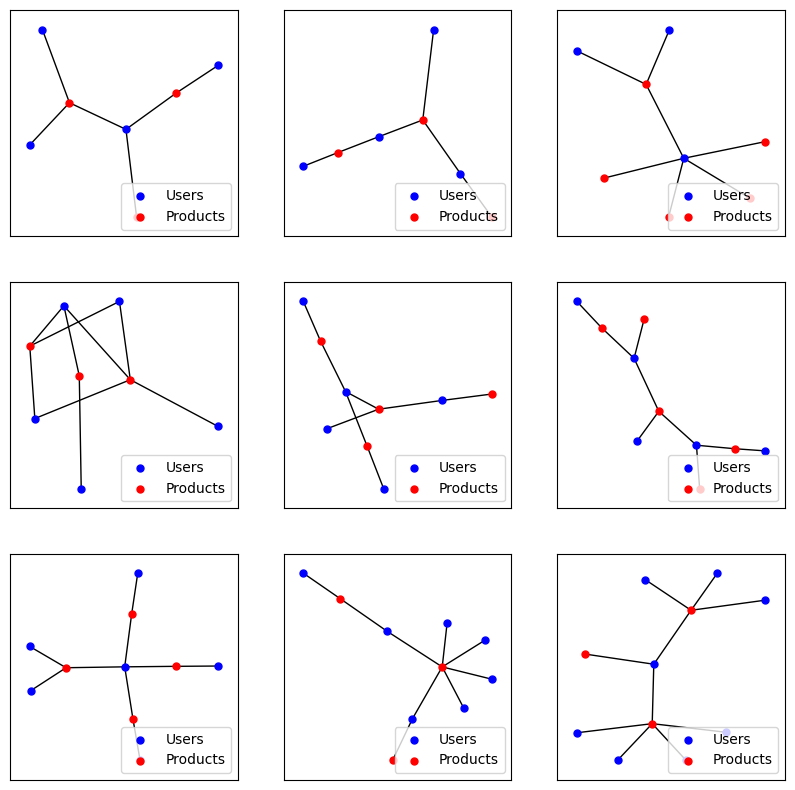

In [73]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    p = np.array(list(partition_products[i]))
    c = [e.startswith('B') for e in p]
    not_c = [not e for e in c]
    # nx.draw(UP.subgraph(p), node_size=25, node_color=c)
    pos = nx.spring_layout(UP.subgraph(p))
    nx.draw_networkx_nodes(UP.subgraph(p), pos=pos, nodelist=p[not_c], node_color='blue', label='Users', node_size=25)
    nx.draw_networkx_nodes(UP.subgraph(p), pos=pos, nodelist=p[c], node_color='red', label='Products', node_size=25)
    nx.draw_networkx_edges(UP.subgraph(p), pos=pos)
    plt.legend(loc='lower right')

plt.show()

In [81]:
# partition_products[0] # PICKLING SPICE, organic PICKLING SPICE, Supplement Drink
# partition_products[1] # Powdered energy drink, Soup Bean and Ham
# partition_products[2] # Brownie, brownies x3, Masala Dossa